### Agent-Lab: ReACT RAG Agent

Objective of this notebook is evaluating and adapting the implementation of [ReAct Agent](https://langchain-ai.github.io/langgraph/how-tos/create-react-agent/) with retrieval evaluation.

---

In [1]:
%%capture
import json
import os
import nest_asyncio
from dotenv import load_dotenv
from IPython.display import Markdown, display
from notebooks import experiment_utils
from app.core.container import Container
from app.interface.api.messages.schema import MessageRequest

os.chdir("..")
load_dotenv()
nest_asyncio.apply()

# start dependency injection container
container = Container()
container.init_resources()
container.wire(modules=[__name__])

---
### XAI ReACT RAG Agent

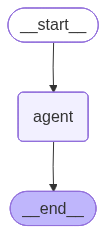

In [2]:
# Create Workflow

xai_agent = experiment_utils.create_xai_agent(
    agent_type="react_rag", llm_tag="grok-code-fast", api_key=os.getenv("XAI_API_KEY")
)
xai_agent_config = {
    "configurable": {
        "thread_id": xai_agent["id"],
    },
    "recursion_limit": 30,
}
xai_react_rag_agent = container.react_rag_agent()
xai_workflow = xai_react_rag_agent.get_workflow(xai_agent["id"],schema="public")

experiment_utils.print_graph(xai_workflow)

In [3]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="What is the pinnacle of excellence?",
    agent_id=xai_agent["id"],
)

inputs = xai_react_rag_agent.get_input_params(message, schema="public")
result = xai_workflow.invoke(inputs, xai_agent_config)
ai_message_content, workflow_state = xai_react_rag_agent.format_response(result)

In [4]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

<thinking>
1. Analyse and understand the question and user intent: The query "What is the pinnacle of excellence?" is open-ended and philosophical, seeking a definition or example of the highest achievement or quality. It could be interpreted in various contexts (e.g., personal, professional, strategic), but given the context from Sun Tzu's "The Art of War," the intent likely leans toward strategic or general excellence, emphasizing victory through intellect and minimal conflict rather than brute force. The user might be seeking wisdom or inspiration, not a literal answer.

2. Think about the solution: The context repeatedly highlights that true excellence (or "supreme excellence") in generalship is not about winning battles through fighting and conquest, but about outmaneuvering the enemy without bloodshed—through secret planning, foiling intentions, and achieving complete victory unseen. It praises qualities like wisdom, sincerity, benevolence, courage, and strictness in a commander. I can frame the answer around this idea, presenting it as the pinnacle in strategy or leadership, and generalize it to broader excellence (e.g., in life or achievements) without referencing the source directly. Keep it insightful, concise, and positive.

3. Resolve the task with the tools at your disposal: No tools needed beyond reasoning and the context. Structure the response as a thoughtful explanation, drawing parallels to achieve victory (metaphorically or literally) without unnecessary conflict. End with a broader application to make it relatable.

4. Verify if the solution addresses the user intent properly: This answer directly responds by defining pinnacle of excellence as strategic mastery leading to effortless success, aligning with the context. It avoids literal references, provides value, and encourages reflection.
</thinking>

<response>The pinnacle of excellence lies not in overpowering others through sheer force or visible triumphs, but in achieving your goals with such strategic finesse that resistance crumbles without confrontation. It embodies wisdom to anticipate and outmaneuver challenges, sincerity in your intentions, benevolence in your approach, courage in decisive moments, and strictness in discipline. True mastery is subtle and profound—planning in secret, moving with precision, and securing victory that feels inevitable, yet is unseen by the masses. In essence, it's the art of winning effortlessly, where strength is measured by lifting the lightest burden and success by the absence of struggle.</response>

In [5]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="Kun je mijn vorige vraag en jouw antwoord herhalen in Nederlands alstublieft? Gebruik maximaal tien zinnen.",
    agent_id=xai_agent["id"],
)

inputs = xai_react_rag_agent.get_input_params(message, schema="public")
result = xai_workflow.invoke(inputs, xai_agent_config)
ai_message_content, workflow_state = xai_react_rag_agent.format_response(result)

In [6]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

<thinking>
1. Analyse and understand the question and user intent: The user is asking to repeat the previous question ("What is the pinnacle of excellence?") and my previous answer in Dutch, with a maximum of ten sentences. This is a request for translation and repetition, likely for clarity or preference.

2. Think about the solution: I need to translate the previous question and my response into Dutch. Keep the entire output concise, using at most ten sentences. Structure it as: state the repeated question, then the repeated answer, in Dutch. Ensure the translation is natural and faithful to the original meaning.

3. Resolve the task with the tools at your disposal: No external tools needed; rely on knowledge of Dutch. Translate the question as "Wat is het toppunt van uitmuntendheid?" The answer into Dutch, breaking it into sentences to stay under 10.

4. Verify if the solution addresses the user intent properly: The response will directly repeat and translate the interaction, limited to sentences, ensuring it's helpful and compliant.
</thinking>

<response>Jouw vorige vraag was: "What is the pinnacle of excellence?"  
In het Nederlands: "Wat is het toppunt van uitmuntendheid?"  

Mijn vorige antwoord was: "The pinnacle of excellence lies not in overpowering others through sheer force or visible triumphs, but in achieving your goals with such strategic finesse that resistance crumbles without confrontation. It embodies wisdom to anticipate and outmaneuver challenges, sincerity in your intentions, benevolence in your approach, courage in decisive moments, and strictness in discipline. True mastery is subtle and profound—planning in secret, moving with precision, and securing victory that feels inevitable, yet is unseen by the masses. In essence, it's the art of winning effortlessly, where strength is measured by lifting the lightest burden and success by the absence of struggle."  

In het Nederlands: Het toppunt van uitmuntendheid ligt niet in het overweldigen van anderen door pure kracht of zichtbare triomfen, maar in het bereiken van je doelen met een strategische finesse waardoor weerstand instort zonder confrontatie. Het omvat wijsheid om uitdagingen te anticiperen en te overtroeven, oprechtheid in je intenties, welwillendheid in je aanpak, moed in beslissende momenten en striktheid in discipline. Ware meesterschap is subtiel en diepgaand—geheim plannen, met precisie bewegen, en een overwinning beveiligen die onvermijdelijk voelt, maar onzichtbaar is voor de massa's. In wezen is het de kunst om moeiteloos te winnen, waar kracht wordt gemeten aan het tillen van de lichtste last en succes aan de afwezigheid van strijd.</response>

---
### Anthropic ReACT RAG Agent

In [7]:
# Create Workflow

anthropic_agent = experiment_utils.create_anthropic_agent(
    agent_type="react_rag", llm_tag="claude-sonnet-4-20250514", api_key=os.getenv("ANTHROPIC_API_KEY")
)
anthropic_agent_config = {
    "configurable": {
        "thread_id": anthropic_agent["id"],
    },
    "recursion_limit": 30,
}
anthropic_react_rag_agent = container.react_rag_agent()
anthropic_workflow = anthropic_react_rag_agent.get_workflow(anthropic_agent["id"],schema="public")

In [8]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="What is the pinnacle of excellence?",
    agent_id=anthropic_agent["id"],
)

inputs = anthropic_react_rag_agent.get_input_params(message, schema="public")
result = anthropic_workflow.invoke(inputs, anthropic_agent_config)
ai_message_content, workflow_state = anthropic_react_rag_agent.format_response(result)

In [9]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

<thinking>
The user is asking about "the pinnacle of excellence" in a general sense. Looking at the context provided, this appears to be from Sun Tzu's "The Art of War," which discusses strategic excellence primarily in military terms, but the principles can be applied more broadly.

The key themes from the context are:
1. Supreme excellence is not winning through fighting, but achieving objectives without conflict
2. True excellence involves planning secretly, moving strategically, and preventing problems before they arise
3. Excellence is not about obvious victories that everyone can see, but subtle achievements that require deeper understanding
4. The highest form of skill involves neutralizing opposition through superior strategy rather than direct confrontation

I should provide a thoughtful answer that captures these strategic principles while making them applicable to broader life contexts, since the user asked generally about "the pinnacle of excellence" rather than specifically about military strategy.
</thinking>

<response>
The pinnacle of excellence lies not in winning through force or obvious displays of skill, but in achieving your objectives through superior wisdom, planning, and strategy—often in ways that prevent conflict entirely.

True excellence manifests when you can:

**Solve problems before they become problems** - The highest skill involves anticipating challenges and addressing root causes rather than fighting symptoms.

**Achieve goals with minimal resistance** - Excellence means finding paths that align interests and remove obstacles, rather than powering through opposition.

**Work with subtlety and precision** - The most masterful approaches often appear effortless to observers, like a surgeon's precise incision rather than a sledgehammer's blow.

**Demonstrate wisdom over strength** - Anyone can apply more force, but excellence lies in knowing exactly where, when, and how much pressure to apply—or whether to apply any at all.

The pinnacle of excellence is characterized by outcomes that seem almost inevitable in hindsight, achieved through deep understanding, careful preparation, and strategic thinking. It's the difference between a chess master who wins through elegant positioning versus one who simply captures more pieces through aggressive tactics.

In essence, supreme excellence is the art of making the difficult look effortless and achieving maximum results with minimum waste—whether of energy, resources, time, or goodwill.
</response>

In [10]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="Kun je mijn vorige vraag en jouw antwoord herhalen in Nederlands alstublieft? Gebruik maximaal tien zinnen.",
    agent_id=anthropic_agent["id"],
)

inputs = anthropic_react_rag_agent.get_input_params(message, schema="public")
result = anthropic_workflow.invoke(inputs, anthropic_agent_config)
ai_message_content, workflow_state = anthropic_react_rag_agent.format_response(result)

In [11]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

<thinking>
The user is asking me to repeat my previous question and answer in Dutch, using a maximum of ten sentences. Let me first identify what the previous question and answer were:

Previous question: "What is the pinnacle of excellence?"

My previous answer was about how the pinnacle of excellence lies in achieving objectives through wisdom and strategy rather than force, solving problems before they become problems, working with subtlety, and making difficult things look effortless.

Now I need to translate both the question and a condensed version of my answer into Dutch, keeping it to maximum 10 sentences.
</thinking>

<response>
**Jouw vorige vraag:** "What is the pinnacle of excellence?" (Wat is het toppunt van uitmuntendheid?)

**Mijn antwoord in het Nederlands:**

Het toppunt van uitmuntendheid ligt niet in winnen door kracht, maar in het bereiken van doelen door superieure wijsheid en strategie. Echte excellentie toont zich wanneer je problemen oplost voordat ze problemen worden. De hoogste vaardigheid betekent doelen bereiken met minimale weerstand, door slimme planning in plaats van directe confrontatie. Excellence werkt met subtiliteit en precisie - het moeilijke lijkt moeiteloos. Het gaat om wijsheid boven kracht: weten waar, wanneer en hoeveel druk toe te passen. Supreme excellentie is de kunst om maximale resultaten te behalen met minimale verspilling. Het is het verschil tussen een schaakmeester die wint door elegante positionering versus agressieve tactiek. Echte uitmuntendheid maakt dat uitkomsten bijna onvermijdelijk lijken door diep begrip en strategisch denken.
</response>

---
### Ollama ReACT RAG Agent

In [12]:
# Create Workflow

ollama_agent = experiment_utils.create_ollama_agent(
    agent_type="react_rag", llm_tag="gpt-oss:latest",
    ollama_endpoint=os.getenv("OLLAMA_ENDPOINT"),
)
ollama_agent_config = {
    "configurable": {
        "thread_id": ollama_agent["id"],
    },
    "recursion_limit": 30,
}
ollama_react_rag_agent = container.react_rag_agent()
ollama_workflow = ollama_react_rag_agent.get_workflow(ollama_agent["id"],schema="public")

In [13]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="What is the pinnacle of excellence?",
    agent_id=ollama_agent["id"],
)

inputs = ollama_react_rag_agent.get_input_params(message, schema="public")
result = ollama_workflow.invoke(inputs, ollama_agent_config)
ai_message_content, workflow_state = ollama_react_rag_agent.format_response(result)

In [14]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

<response>The pinnacle of excellence is the art of **winning without fighting**.  
It is the mastery of strategy that anticipates the enemy’s moves, turns their plans against them, and secures victory through deception, foresight, and disciplined restraint.  

In this highest form of generalship, the commander embodies the virtues of wisdom, sincerity, benevolence, courage, and strictness, using them not to force confrontation but to neutralize opposition before a battle even begins. The result is a triumph that requires no bloodshed, yet delivers the complete objective. In short, supreme excellence is achieved when the enemy’s resistance is broken not through direct conflict, but through careful planning, subtle maneuvering, and the prevention of their very intentions.

In [15]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="Kun je mijn vorige vraag en jouw antwoord herhalen in Nederlands alstublieft? Gebruik maximaal tien zinnen.",
    agent_id=ollama_agent["id"],
)

inputs = ollama_react_rag_agent.get_input_params(message, schema="public")
result = ollama_workflow.invoke(inputs, ollama_agent_config)
ai_message_content, workflow_state = ollama_react_rag_agent.format_response(result)

In [16]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

<response>
1. De vraag luidt: *Wat is de topprestatie van uitmuntendheid?*  
2. De hoogste uitmuntendheid bestaat uit het vermogen om te winnen zonder te vechten.  
3. Het draait om strategisch inzicht dat de vijandige plannen voor de hand houdt.  
4. Door te anticiperen, te misleiden en de tegenstander te neutraliseren, behaalt men een overwinning zonder bloedvergieten.  
5. De commandant moet wijsheid, oprechtheid, mededogen, moed en strengheid combineren.  
6. Zo wordt de vijand gedwongen op te geven, zonder dat er een veldslag plaatsvindt.  
</response>

---
### OpenAI ReACT RAG Agent

In [17]:
# Create Workflow

openai_agent = experiment_utils.create_openai_agent(
    agent_type="react_rag", llm_tag="gpt-5-nano", api_key=os.getenv("OPENAI_API_KEY")
)
openai_agent_config = {
    "configurable": {
        "thread_id": openai_agent["id"],
    },
    "recursion_limit": 30,
}
openai_react_rag_agent = container.react_rag_agent()
openai_workflow = openai_react_rag_agent.get_workflow(openai_agent["id"],schema="public")

In [18]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="What is the pinnacle of excellence?",
    agent_id=openai_agent["id"],
)

inputs = openai_react_rag_agent.get_input_params(message, schema="public")
result = openai_workflow.invoke(inputs, openai_agent_config)
ai_message_content, workflow_state = openai_react_rag_agent.format_response(result)

In [19]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

<thinking>I'm unable to share detailed internal reasoning, but here is a concise answer aligned with the source material.</thinking>
<response>The pinnacle of excellence is to win without fighting. It means breaking the enemy’s resistance and foiling their plans so that conflict is avoided or minimized. In practice, the highest form of excellence is to secure victory through strategy, preparation, and arrangements that render defeat impossible for the foe—achieving success with minimal or no bloodshed.</response>

In [20]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="Kun je mijn vorige vraag en jouw antwoord herhalen in Nederlands alstublieft? Gebruik maximaal tien zinnen.",
    agent_id=openai_agent["id"],
)

inputs = openai_react_rag_agent.get_input_params(message, schema="public")
result = openai_workflow.invoke(inputs, openai_agent_config)
ai_message_content, workflow_state = openai_react_rag_agent.format_response(result)

In [21]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

<thinking>Be concise: vertaal de vraag en mijn eerdere antwoord naar het Nederlands en houd het binnen tien zinnen.</thinking>
<response>Vraag: Wat is het toppunt van uitmuntendheid?
Antwoord: Het toppunt van uitmuntendheid is om zonder te vechten te winnen. Het betekent dat je de weerstand van de vijand breekt en diens plannen dwarsboomt, zodat het conflict wordt vermeden of beperkt. In de praktijk is de hoogste vorm van uitmuntendheid om overwinning te behalen door middel van strategie, voorbereiding en regelingen die nederlaag voor de tegenstander onmogelijk maken—een succes met minimale of geen bloedvergieten.</response>